In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("./datosLimpios2022.csv")

In [5]:
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.90
1,Entrada,Ecuatorianos,2022,5,26,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,Europa,SUIZA SWITZERLAND,ECUADOR,PICHINCHA,1,68,1200.98
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.90
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.90
4,Entrada,Ecuatorianos,2022,2,1,Mujer,ECUADOR,Vía Aérea,Residencia,Europa,América,Europa,ESPAÑA,ESPAÑA,PICHINCHA,1,38,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.90
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.90
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.90
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.90


In [6]:
x= df.loc[:,["precio_pasaje","edad"]]

In [7]:
inercias= []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(x)
    inercias.append(kmeans.inertia_)

In [8]:
df2 = pd.DataFrame({"k":np.arange(1,20),"inercias":inercias})

<Axes: xlabel='k', ylabel='inercias'>

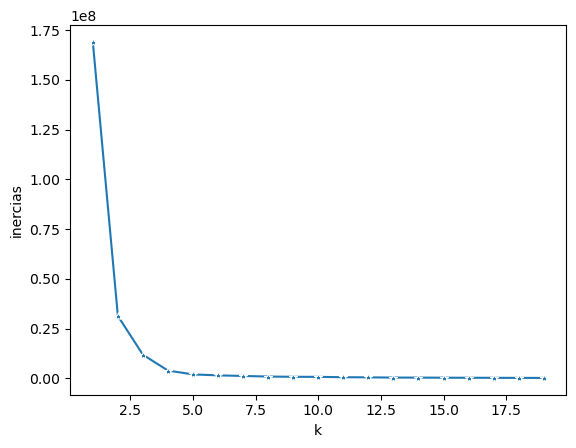

In [9]:
sns.lineplot(data=df2, x="k",y="inercias", marker="*")

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(x)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [11]:
df["cluster"]= kmeans.labels_
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje,cluster
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.90,0
1,Entrada,Ecuatorianos,2022,5,26,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,Europa,SUIZA SWITZERLAND,ECUADOR,PICHINCHA,1,68,1200.98,1
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.90,0
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.90,0
4,Entrada,Ecuatorianos,2022,2,1,Mujer,ECUADOR,Vía Aérea,Residencia,Europa,América,Europa,ESPAÑA,ESPAÑA,PICHINCHA,1,38,1000.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.90,0
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.90,0
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.90,0
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.90,0


In [12]:
dfentrada = df.loc[df["tip_movi"]== "Entrada", :]
dfsalida = df.loc[df["tip_movi"]== "Salida", :]

In [13]:
dfg=dfentrada.loc[:,["precio_pasaje","edad", "cluster"]]

C:\Users\darin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


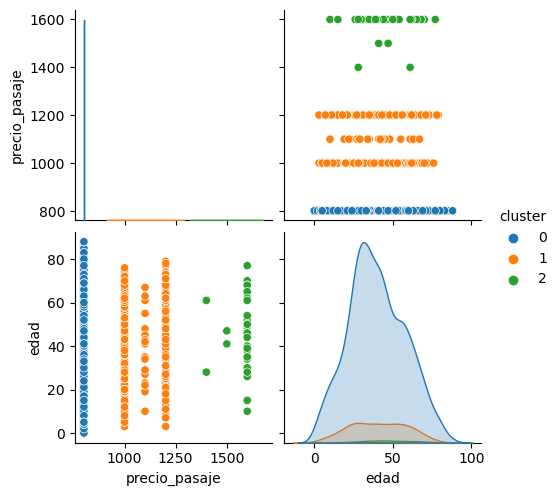

In [14]:
#Hay alguna relacion entre los que gastan los pasajeros y y su edades
#Se puede observar 3 grupos donde la edad no es muy marcada pero si hay grandes diferencia en el precio, en los pasajeros
#que hay menos precio y un mediano precio hay de todas la edades mientras que en los de psajes mas caros si se ve una 
#concentracion de edades mayore a 20
sns.pairplot(dfg,hue="cluster", palette="tab10")

C:\Users\darin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


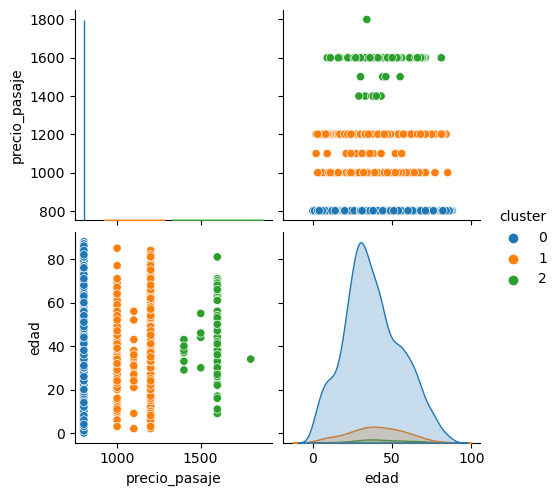

In [15]:
dfg2=dfsalida.loc[:,["precio_pasaje","edad", "cluster"]]
sns.pairplot(dfg2,hue="cluster", palette="tab10")

In [16]:
df.loc[df["cluster"]==0,:]

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje,cluster
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.9,0
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.9,0
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.9,0
5,Entrada,Ecuatorianos,2022,5,8,Hombre,ECUADOR,Vía Aérea,Residencia,América,América,América,COLOMBIA,ECUADOR,PICHINCHA,1,62,800.9,0
6,Salida,Ecuatorianos,2022,10,24,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,28,800.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.9,0
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.9,0
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.9,0
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.9,0


## Verificar el imbalance

In [18]:
df["cluster"].value_counts()

cluster
0    8892
1     921
2     122
Name: count, dtype: int64

## Manejar el imbalance

In [19]:
df0 = df.loc[df["cluster"]==0,:]

In [25]:
df0.shape

(8892, 19)

In [21]:
df1 = df.loc[df["cluster"]==1,:]

In [26]:
df1.shape

(921, 19)

In [23]:
df2 = df.loc[df["cluster"]==2,:]

In [27]:
df2.shape

(122, 19)

In [37]:
dff = pd.concat([df0.sample(n=122, random_state=0),df1.sample(n=122, random_state=0),df2])

In [38]:
dff["cluster"].value_counts()

cluster
0    122
1    122
2    122
Name: count, dtype: int64

## Realizar un feature selection 


In [40]:
dff.columns

Index(['tip_movi', 'tip_naci', 'anio_movi', 'mes_movi', 'dia_movi', 'sex_migr',
       'nac_migr', 'via_tran', 'mot_viam', 'cont_res', 'cont_nac', 'cont_prod',
       'pais_prod', 'pais_res', 'pro_jefm', 'jef_migr', 'edad',
       'precio_pasaje', 'cluster'],
      dtype='object')

In [46]:
X = dff.loc[:,["anio_movi","mes_movi","dia_movi","precio_pasaje","edad"]]

<Axes: >

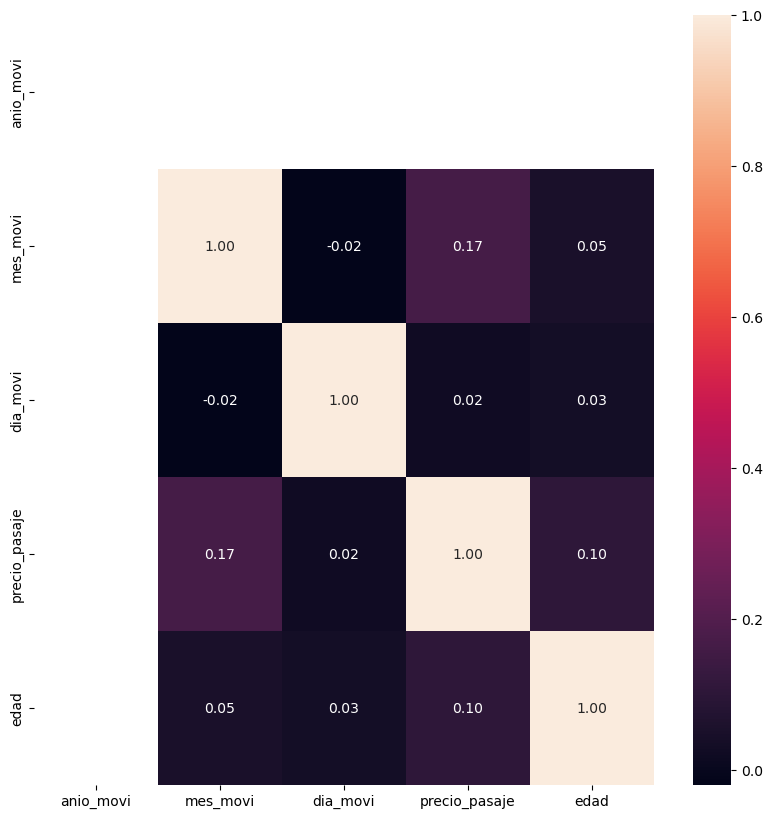

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt=".2f",ax=ax)

In [62]:
columnas_seleccionadas = ["precio_pasaje","edad"]
X = dff[columnas_seleccionadas]

In [63]:
X

,precio_pasaje,edad
3413,800.9,37
3654,800.9,26
1241,800.9,37
9093,800.9,40
7139,800.9,21
...,...,...
9658,1500.0,41
9672,1600.0,27
9781,1600.0,47
9902,1600.0,50


## Escalar el dataset.


In [64]:
scaler = StandardScaler()

In [65]:
scaler.fit(X)

StandardScaler()

In [66]:
X_norm = scaler.transform(X)

## Dividir el dataset en train(70%)/test(30%).


In [67]:
y = dff["cluster"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=42)

## Entrenar modelo de RandomForest con entropy.


In [69]:
# Entrenar el modelo con criterio "entropy"
clf_entropy = RandomForestClassifier(criterion='entropy', random_state=0)
clf_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

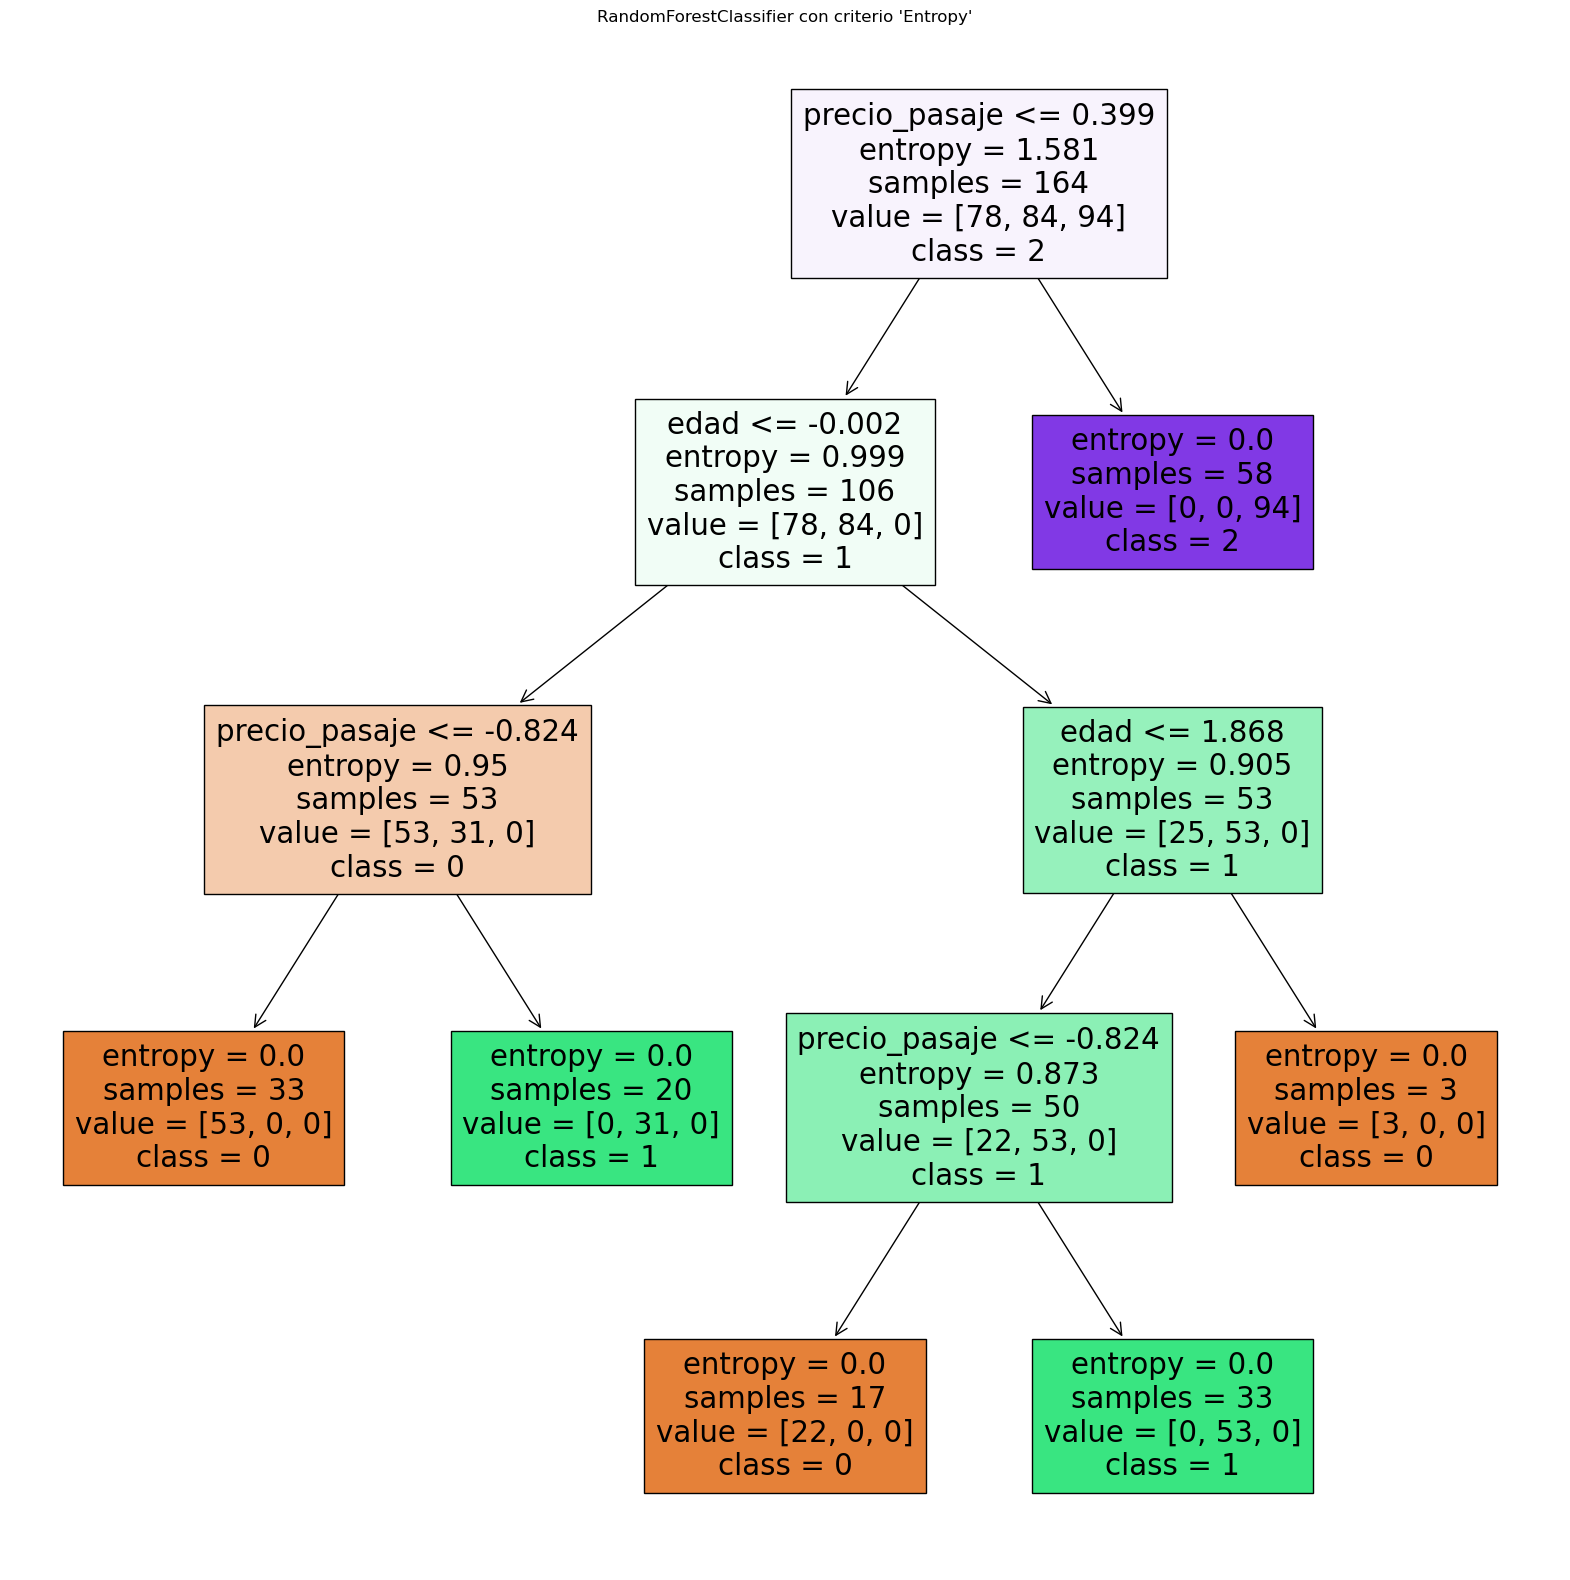

In [70]:
arbol_entropy = clf_entropy.estimators_[0]
plt.figure(figsize=(20, 20))
tree.plot_tree(arbol_entropy, filled=True, feature_names=columnas_seleccionadas, class_names=y.unique().astype(str).tolist())
plt.title("RandomForestClassifier con criterio 'Entropy'")
plt.show()

## Evaluación de modelo

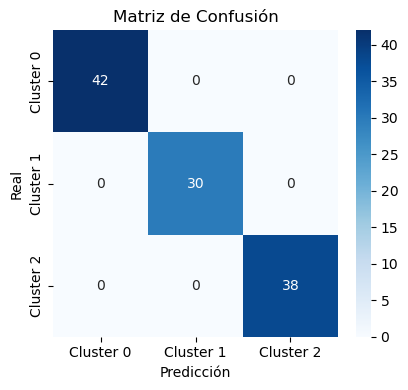

In [71]:
y_pred_entropy = clf_entropy.predict(X_test)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
sns.heatmap(cm_entropy, annot=True, fmt="d", cmap="Blues", xticklabels=['Cluster 0', 'Cluster 1',"Cluster 2"], yticklabels=['Cluster 0', 'Cluster 1',"Cluster 2"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()